In [189]:
#Install and import packages:

!pip install langchain --quiet
!pip install lime --quiet
!pip install openai --quiet
!pip install pandas --quiet
!pip install scikit-learn --quiet
!pip install seaborn --quiet
!pip install shap --quiet
!pip install transformers --quiet
!pip install torch --quiet
!pip install wordcloud --quiet
!pip uninstall numpy -y --quiet
!pip install numpy==1.25.0 --quiet

In [425]:
#Install and import packages

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForMaskedLM, pipeline

In [356]:
#Create dataframe: download/read CSV file into a Pandas DataFrame

import io
import requests

file_id = "1wdaIQytMzC4HlZblMSIAuEYBh4c-loI2"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the contents of the CSV file
download = requests.get(url).content

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(download.decode("utf-8")))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


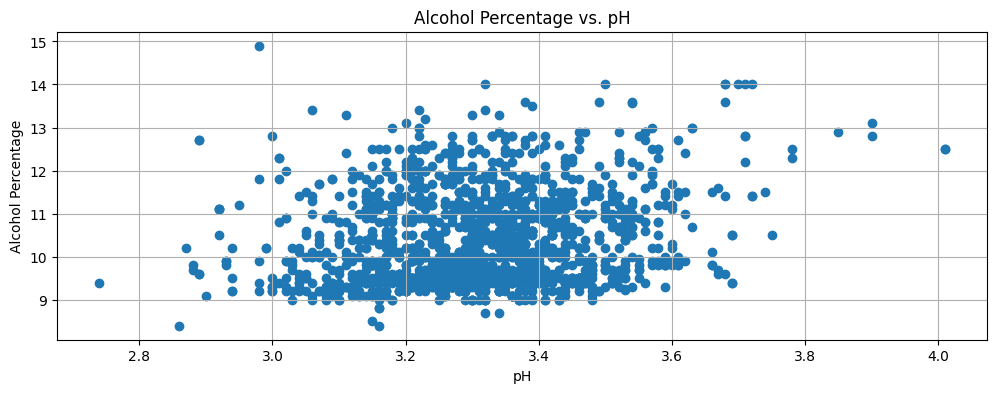

In [618]:
# Create a scatter plot of pH vs Alcohol

plt.figure(figsize = (12, 4))
plt.title("Alcohol Percentage vs. pH")

plt.grid()
plt.scatter(df["pH"], df["alcohol"])
plt.ylabel("Alcohol Percentage")
plt.xlabel("pH")

plt.show()

In [377]:
SEED = 42

In [642]:
X = df[['pH']]
y = df[['alcohol']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.2, shuffle=True)

In [612]:
# Initialise and train a logistic regression model
regressionObject = LinearRegression().fit(X, y)
r_sq = regressionObject.score(X, y)

print("intercept: ", regressionObject.intercept_)
print("coefficient: ", regressionObject.coef_)
print("coefficient of determination, R^2: ", r_sq)

intercept:  [5.72319441]
coefficient:  [[1.41939838]]
coefficient of determination, R^2:  0.042284728554263684


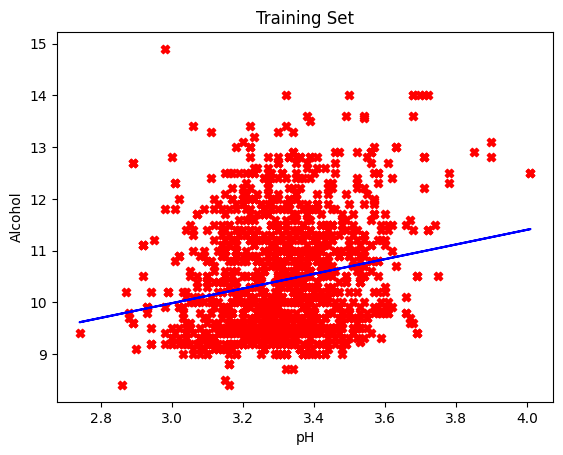

In [640]:
plt.scatter(X_train, y_train, color = 'red', marker = 'X')
plt.plot(X_train, regressionObject.predict(X_train), color = 'blue')
plt.title("Training Set")
plt.xlabel('pH')
plt.ylabel('Alcohol')
plt.show()

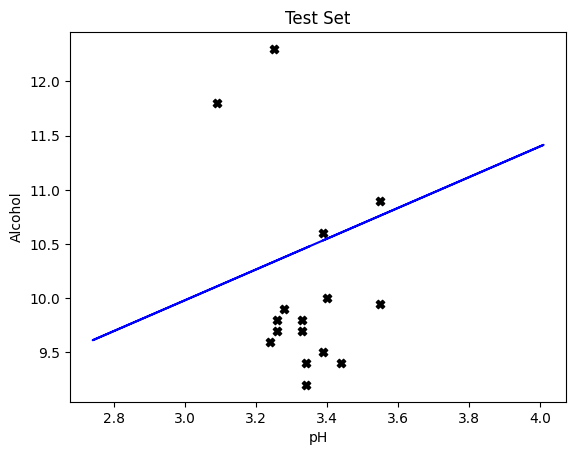

In [641]:
plt.scatter(X_test, y_test, color = 'black', marker = 'X')
plt.plot(X_train, regressionObject.predict(X_train), color = 'blue')
plt.title("Test Set")
plt.xlabel('pH')
plt.ylabel('Alcohol')
plt.show()